In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [9]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Assignment-1/car truck/train',
                                                 target_size = (64, 64),
                                                 batch_size = 5,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Assignment-1/car truck/validation',
                                            target_size = (64, 64),
                                            batch_size = 5,
                                            class_mode = 'binary')


Found 70 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [11]:
history = classifier.fit_generator(training_set,
                         samples_per_epoch = 128,
                         nb_epoch =50 ,
                         validation_data = test_set,
                         nb_val_samples = 59)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=25, epochs=50, validation_steps=59)`
  """


Epoch 1/50
25/25 [==============================] - 82s 3s/step - loss: 0.7094 - accuracy: 0.6080 - val_loss: 0.7024 - val_accuracy: 0.6949
Epoch 2/50
25/25 [==============================] - 9s 379ms/step - loss: 0.5907 - accuracy: 0.7200 - val_loss: 0.1704 - val_accuracy: 0.6542
Epoch 3/50
25/25 [==============================] - 10s 384ms/step - loss: 0.4448 - accuracy: 0.8000 - val_loss: 0.4508 - val_accuracy: 0.8949
Epoch 4/50
25/25 [==============================] - 9s 367ms/step - loss: 0.3444 - accuracy: 0.8560 - val_loss: 0.3013 - val_accuracy: 0.9356
Epoch 5/50
25/25 [==============================] - 9s 352ms/step - loss: 0.2747 - accuracy: 0.8800 - val_loss: 0.3916 - val_accuracy: 0.8305
Epoch 6/50
25/25 [==============================] - 9s 373ms/step - loss: 0.1991 - accuracy: 0.9280 - val_loss: 0.0893 - val_accuracy: 0.8983
Epoch 7/50
25/25 [==============================] - 10s 385ms/step - loss: 0.1927 - accuracy: 0.9360 - val_loss: 0.1056 - val_accuracy: 0.8034
Epoch 

Text(0.5, 0, 'Epoch')

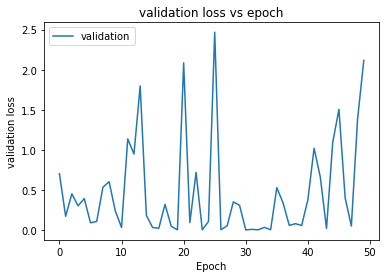

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['val_loss'])
plt.legend(['validation'], loc='upper left')
plt.title('validation loss vs epoch')
plt.ylabel('validation loss')
plt.xlabel('Epoch')